Mahmoud Hamdar 101220821,Hadi Dandash 10221202

Prerequisites
1. Numpy
2. Matplotlib
3. Seaborn
4. Pandas
5. Scikit-learn


Table of Contents
1. Problem Statement and Dataset Description
2. Import Libraries
3. Import Dataset
4. Exploratory Data Analysis
5. Data Visualization
6. Preparing the Data
7. Declare Feature Vector and Target Variable
8. Split the Data into Training and Testing Sets
9. Fit the Decision Tree classifier to the Training Set
10. Text representation of the Tree
11. Visual Representaion of the Tree
12. Conclusion

1.Problem Statement and Dataset Description

Problem Statement
The objective is to predict loan eligibility based on various attributes of loan applicants. This is a binary classification problem, where the target variable, Loan_Status, indicates whether an applicant's loan is approved (1) or not (0).

The model aims to:

Use applicant data to predict loan eligibility.
Provide insights into the factors influencing loan approval.
Improve prediction accuracy through preprocessing, feature engineering, and model tuning.
Dataset Description
The dataset contains information about loan applicants, including demographic details, income, credit history, and loan specifics.

Key Features:

Applicant Information:
Gender: Male or Female.
Married: Marital status of the applicant.
Dependents: Number of dependents (e.g., 0, 1, 2, 3+).
Education: Applicant's education level (Graduate/Not Graduate).
Self_Employed: Whether the applicant is self-employed (Yes/No).

Income Details:
ApplicantIncome: Income of the applicant.
CoapplicantIncome: Income of the co-applicant (if applicable).

Loan Details:
LoanAmount: Requested loan amount.
Loan_Amount_Term: Loan repayment period in months.
Credit_History: Whether the applicant has a credit history (1 = Yes, 0 = No).

Property Details:
Property_Area: Urban, Semiurban, or Rural area of the applicant’s property.

Target Variable:
Loan_Status: Loan approval status (1 = Approved, 0 = Not Approved).

Challenges in the Dataset:

Missing Data:
Some features (e.g. Dependents, Credit_History) have missing values that need imputation.

Outliers:
Extreme values in ApplicantIncome, CoapplicantIncome, or LoanAmount can skew model performance.

Categorical Encoding:
Several categorical variables (e.g.  Education, Property_Area) must be encoded numerically for machine learning algorithms.


Model Selection:

We chose the Decision Tree model since it achieved better accuracy ,recall,precision .
And because some of the data consists of choices (yes/no) it is better to use Decision Tree model.


2. Import Libraries

In [1]:
import pandas as pd
from sklearn import metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

3. Import Dataset

In [2]:
df=pd.read_csv('loan_eligibility.csv')


4. Exploratory Data Analysis

Drop irrelevant columns

In [3]:
df.drop(columns=['Loan_ID','Gender','Married'], inplace=True)
df.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


View summary of dataset

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         599 non-null    object 
 1   Education          614 non-null    object 
 2   Self_Employed      582 non-null    object 
 3   ApplicantIncome    614 non-null    int64  
 4   CoapplicantIncome  614 non-null    float64
 5   LoanAmount         592 non-null    float64
 6   Loan_Amount_Term   600 non-null    float64
 7   Credit_History     564 non-null    float64
 8   Property_Area      614 non-null    object 
 9   Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 48.1+ KB


Frequency distribution of values in variables

In [5]:

df['Loan_Status'].value_counts()


Loan_Status
Y    422
N    192
Name: count, dtype: int64

Explore missing values

In [6]:
df.isna().sum()

Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

5. Data Visualization

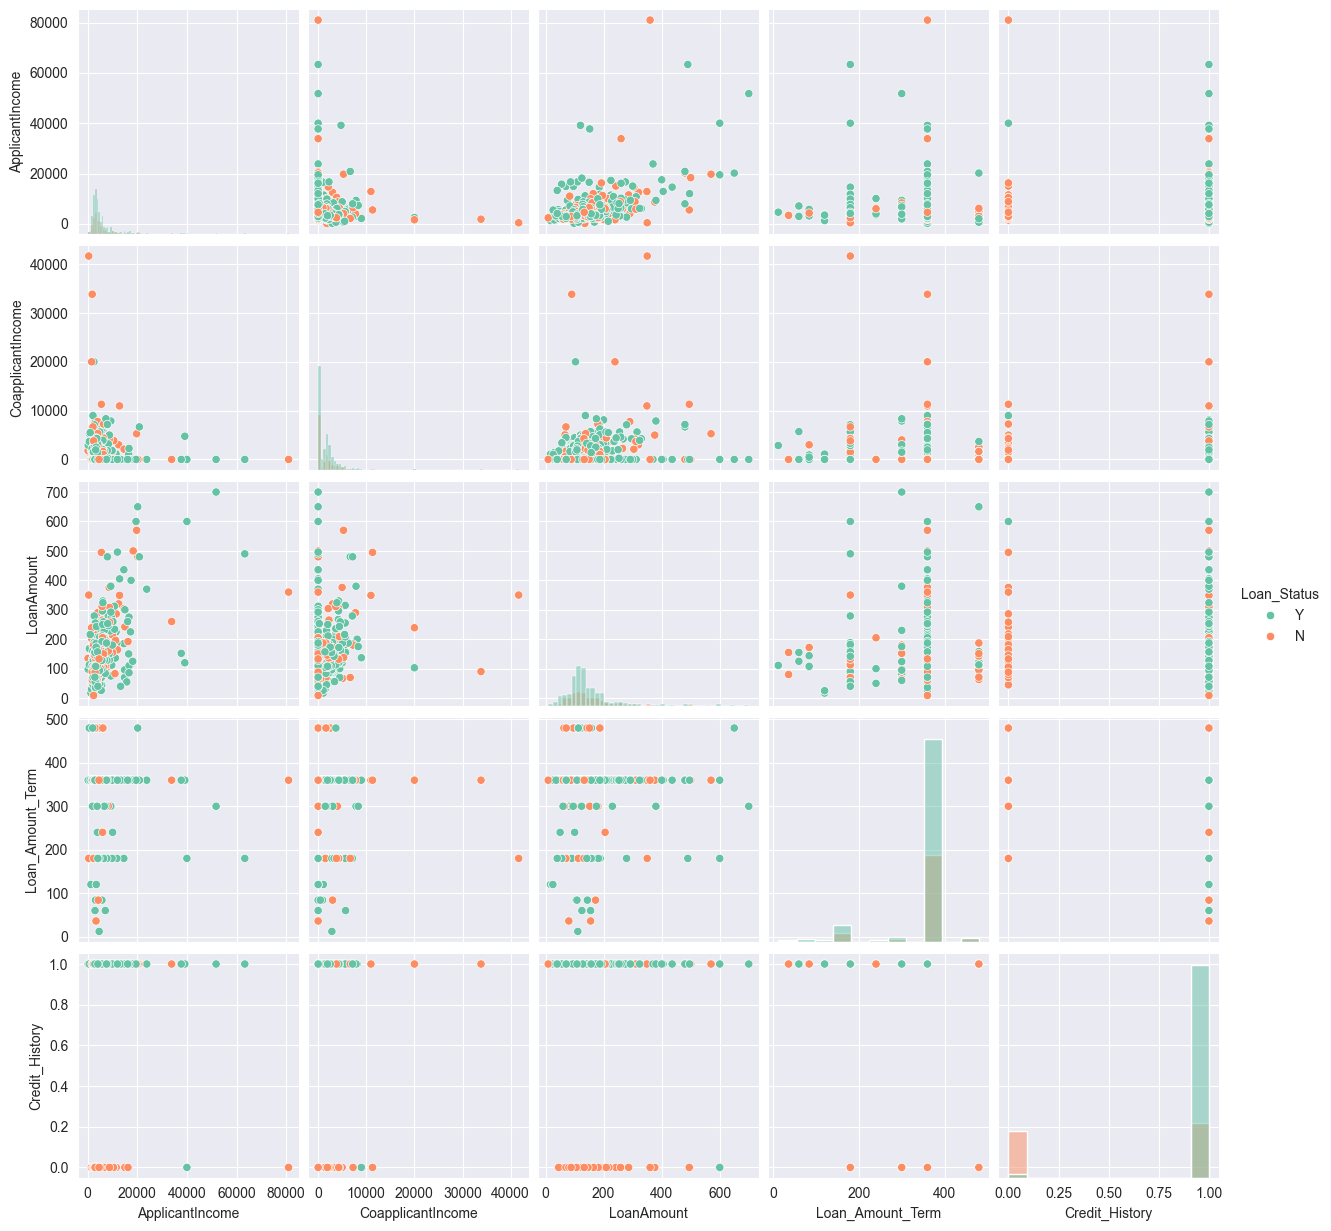

In [7]:
sns.set_palette('Set2')
b = sns.pairplot(data = df,hue="Loan_Status", diag_kind='hist')
plt.show()


6. Preparing the Data

Dealing with missing values

In [8]:
df['Self_Employed'].fillna('Yes', inplace=True)
df['Dependents'].fillna('3+', inplace=True)


df['LoanAmount'].interpolate(inplace=True)
df['Loan_Amount_Term'].interpolate(inplace=True)
df['Credit_History'].fillna(0,inplace=True)


df.dropna(axis=0,how='any', inplace=True)


C:\Users\abbas\AppData\Local\Temp\ipykernel_8184\2308749480.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna('Yes', inplace=True)
C:\Users\abbas\AppData\Local\Temp\ipykernel_8184\2308749480.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

Dealing with Outliers

In [9]:

numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
df = remove_outliers(df, numerical_cols)

Encoding non-numeric Data

In [10]:
encoder = LabelEncoder()
for col in [ 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    df[col] = encoder.fit_transform(df[col])
  


7. Declare Feature Vector and Target Variable

In [11]:

X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']


8. Split the Data into Training and Testing Sets

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

9. Fit the Decision Tree classifier to the Training Set

In [13]:




model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)
print('Accuracy: {:0.4f}'. format(model.score(x_test, y_test)*100))
y_pred = model.predict(x_test)
print('Accuracy: {:0.4f}'. format(metrics.accuracy_score(y_test, y_pred)*100))
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 71.9697
Accuracy: 71.9697
              precision    recall  f1-score   support

           0       0.54      0.55      0.54        40
           1       0.80      0.79      0.80        92

    accuracy                           0.72       132
   macro avg       0.67      0.67      0.67       132
weighted avg       0.72      0.72      0.72       132



9. Text Representation of the Tree

In [14]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_7 <= 0.50
|   |--- feature_5 <= 187.50
|   |   |--- feature_3 <= 4927.00
|   |   |   |--- feature_3 <= 1987.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  1987.00
|   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |--- feature_5 <= 132.50
|   |   |   |   |   |   |--- feature_5 <= 118.00
|   |   |   |   |   |   |   |--- feature_4 <= 331.50
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_4 >  331.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 103.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_5 >  103.00
|   |   |   |   |  

11. Visual Representaion of the Tree

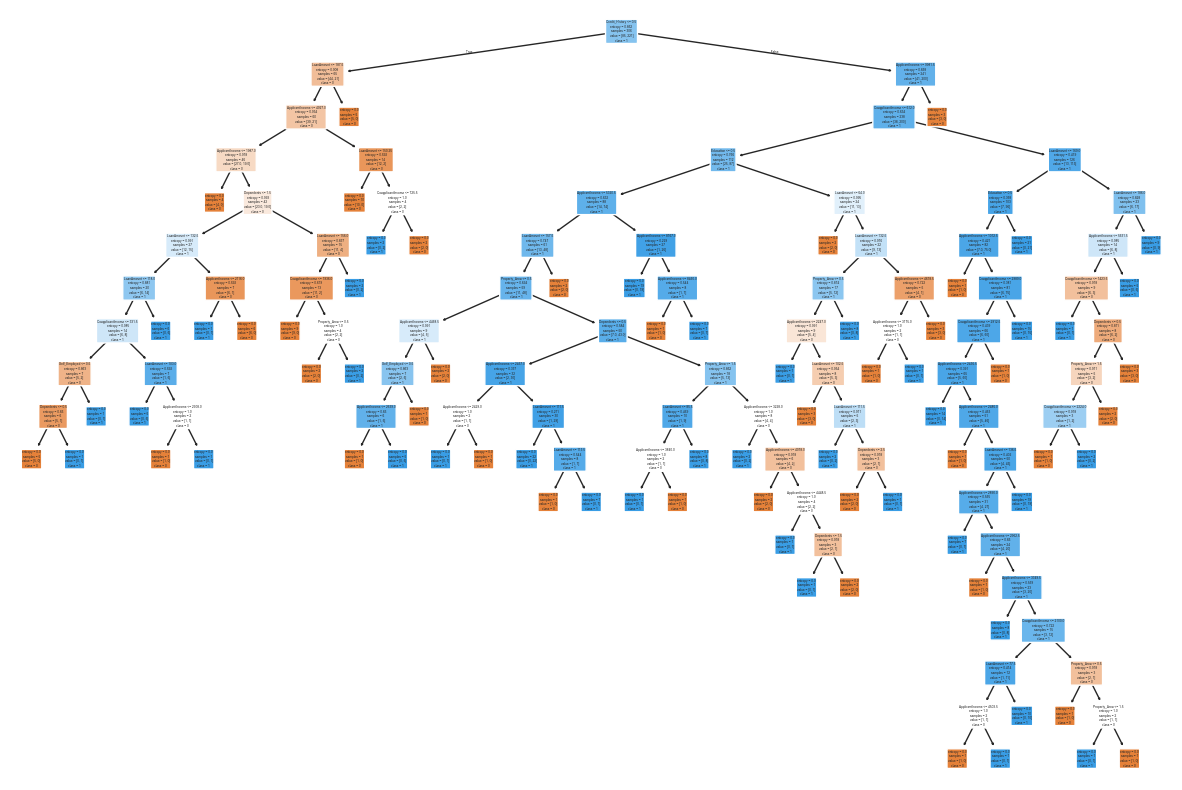

In [15]:

fig = plt.figure(figsize=(15,10))
class_name = [str(cls) for cls in model.classes_]
tree.plot_tree(model,feature_names = df.columns[:-1],class_names = class_name,filled = True,rounded = True)

plt.show()


12. Conclusion and Future Work:


After analyzing the data using Decision Tree model we reached a conclusion that this model predict in favors for giving a Loan (recall,precision high for Yes and low for No).
This means that if the client prefer a model that favors a yes to loan then this model is best for him while if he prefers a No favored model then we need to work farther on this model to sustain the clients needs.
For future development we can work on this model to balance its prediction for yes and no of a loan